In [4]:

from sklearn.model_selection import train_test_split
import pandas as pd

In [5]:
cotton_2021_path = "Crop-dataset\\Cotton\\cotton2021.csv"
cotton_2022_path = "Crop-dataset\\Cotton\\cotton2022.csv"
cotton_2023_path = "Crop-dataset\\Cotton\\cotton2023.csv"
rice_2021_path = "Crop-dataset\\Rice\\rice2021.csv"
rice_2022_path = "Crop-dataset\\Rice\\rice2022.csv"
rice_2023_path = "Crop-dataset\\Rice\\rice2023.csv"

In [6]:
cotton_2021_df = pd.read_csv(cotton_2021_path)
cotton_2022_df = pd.read_csv(cotton_2022_path)
cotton_2023_df = pd.read_csv(cotton_2023_path)
rice_2021_df = pd.read_csv(rice_2021_path)
rice_2022_df = pd.read_csv(rice_2022_path)
rice_2023_df = pd.read_csv(rice_2023_path)

In [7]:
cotton_2021_df['label'] = 1 
cotton_2021_df['year'] = 2021 
rice_2021_df['label'] = 0
rice_2021_df['year'] = 2021
cotton_2022_df['label'] = 1 
cotton_2022_df['year'] = 2022 
rice_2022_df['label'] = 0
rice_2022_df['year'] = 2022
cotton_2023_df['label'] = 1 
cotton_2023_df['year'] = 2023
rice_2023_df['label'] = 0
rice_2023_df['year'] = 2023

In [8]:
combined_data = pd.concat([cotton_2021_df, rice_2021_df, cotton_2022_df, rice_2022_df, cotton_2023_df, rice_2023_df], axis=0)

In [9]:
combined_data.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,label,year
0,0.153184,0.222615,0.498528,0.611280,0.285032,0.112775,0.529626,0.546617,0.604374,0.571359,0.620985,0.496628,1,2021
1,0.137897,0.106036,0.169626,0.330396,0.594655,0.227967,0.578199,0.661604,0.783454,0.777313,0.729177,0.636792,1,2021
2,0.122481,0.088123,0.182121,0.376037,0.431042,0.350422,0.630027,0.724557,0.844643,0.673307,0.736385,0.635118,1,2021
3,0.085279,0.091887,0.140729,0.243528,0.224835,0.046875,0.579180,0.666857,0.611009,0.625423,0.612167,0.208681,1,2021
4,0.091678,0.094313,0.247900,0.367800,0.546883,0.476697,0.699308,0.768818,0.753445,0.711491,0.707040,0.647931,1,2021


# scalling testing

In [112]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from Data_Processing import DataPreProcess # Import the class from the module

def test_data_preprocessing():
    # Create dummy data
    np.random.seed(42)
    
    # Generate a sample dataset
    data = pd.DataFrame({
        'year': [2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029],
        'feature1': np.random.randn(10) * 10 + 50,  # normally distributed with mean 50
        'feature2': np.random.randn(10) * 5 + 100,  # normally distributed with mean 100
        'categorical_feature': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A'],
        'label': [0, 1, 1, 0, 1, 0, 1, 0, 1, 0]
    })
    
    # Split the data
    X = data.drop('label', axis=1)
    y = data['label']
    
    # Use train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Create an instance of the preprocessing class
    preprocessor = DataPreProcess()
    
    # Apply scaling
    X_train_scaled, X_test_scaled = preprocessor.scalling(X_train, X_test)
    
    # Print original and scaled data to verify
    print("Original Training Data:")
    print(X_train)
    print("\nScaled Training Data:")
    print(X_train_scaled)
    
    # Verify scaling has been applied to numeric columns
    numeric_columns = ['feature1', 'feature2']
    for col in numeric_columns:
        print(f"\n{col} - Original Mean: {X_train[col].mean():.2f}, Scaled Mean: {X_train_scaled[col].mean():.2f}")
        print(f"{col} - Original Std: {X_train[col].std():.2f}, Scaled Std: {X_train_scaled[col].std():.2f}")
    
    # Confirm categorical and other columns remain unchanged
    print("\nCategorical column remains unchanged:")
    print(X_train_scaled['categorical_feature'].equals(X_train['categorical_feature']))

# Run the test
if __name__ == "__main__":
    test_data_preprocessing()

Original Training Data:
   year   feature1    feature2 categorical_feature
0  2020  54.967142   97.682912                   A
7  2027  57.674347  101.571237                   B
2  2022  56.476885  101.209811                   C
9  2029  55.425600   92.938481                   A
4  2024  47.658466   91.375411                   B
3  2023  65.230299   90.433599                   A
6  2026  65.792128   94.935844                   A

Scaled Training Data:
   year  feature1  feature2 categorical_feature
0  2020 -0.453004  0.463861                   A
7  2027  0.012164  1.389955                   B
2  2022 -0.193591  1.303873                   C
9  2029 -0.374229 -0.666133                   A
4  2024 -1.708826 -1.038414                   B
3  2023  1.310475 -1.262728                   A
6  2026  1.407012 -0.190415                   A

feature1 - Original Mean: 57.60, Scaled Mean: -0.00
feature1 - Original Std: 6.29, Scaled Std: 1.08

feature2 - Original Mean: 95.74, Scaled Mean: 0.00
feature2

In [10]:
from Data_Processing import DataPreProcess
dp=DataPreProcess()

# Split your data
X_train = combined_data.iloc[0:200, :]
X_test = combined_data.iloc[200:, :]

# Scale the data
X_train_scaled, X_test_scaled = dp.scalling(X_train=X_train, X_test=X_test)

In [11]:
X_train_scaled.mean()

NDVI01    1.509903e-16
NDVI02    5.773160e-17
NDVI03    6.217249e-17
NDVI04   -6.039613e-16
NDVI05    5.329071e-16
NDVI06   -2.153833e-16
NDVI07    6.039613e-16
NDVI08    2.486900e-16
NDVI09    1.003642e-15
NDVI10    1.509903e-15
NDVI11    6.927792e-16
NDVI12    4.352074e-16
label     1.000000e+00
year      2.021000e+03
dtype: float64

# Correlation testing

In [12]:
X_train,X_test=dp.address_correlation(X_train,X_test,['NDVI01','NDVI02'])

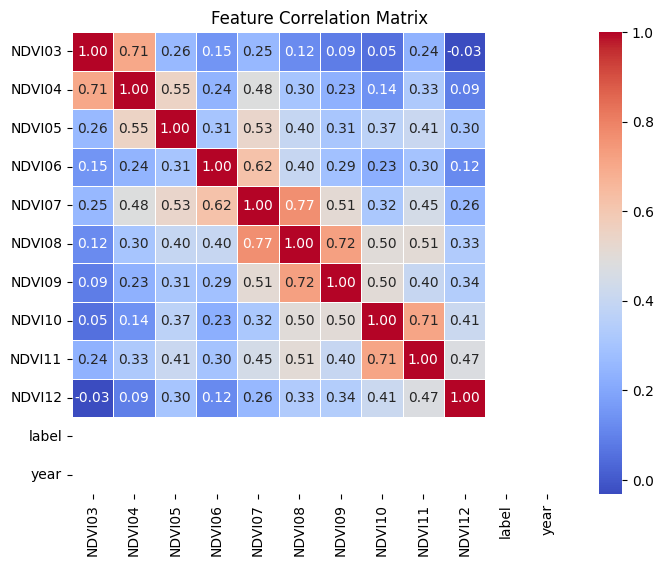

In [13]:
dp.plot_correlation(X_train)